In [ ]:
from quantum_calculation.basis_set.basis_set import BasisSet

basis_set1 = BasisSet("STO-3G")
basis_set1.show_basis_set()

basis_set2 = BasisSet("6-31G")
basis_set2.show_basis_set()

Basis set: STO-3G
H (Charge: 1): {'S3': array([[3.42525091, 0.15432897],
       [0.62391373, 0.53532814],
       [0.1688554 , 0.44463454]])}
He (Charge: 2): {'S3': array([[6.36242139, 0.15432897],
       [1.158924  , 0.53532814],
       [0.31364979, 0.44463454]])}
Basis set: 6-31G
H (Charge: 1): {'S3': array([[18.73113696,  0.0334946 ],
       [ 2.82539437,  0.23472695],
       [ 0.64012169,  0.81375733]]), 'S1': array([[0.16127776, 1.        ]])}


In [14]:
from quantum_calculation.hartree_fock import HartreeFock

H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 1.2'
hf = HartreeFock(H2, 'sto-3g')
print(f'coordinates: {hf.coordinates}\n')

print('basis_functions:')
for key, value in hf.basis_functions.items():
    print(f'{key}: {value}')

coordinates: [{'symbol': 'H', 'coord': (0.0, 0.0, 0.0), 'charge': 1}, {'symbol': 'H', 'coord': (0.0, 0.0, 1.2), 'charge': 1}]

basis_functions:
alpha: [array([3.42525091, 0.62391373, 0.1688554 ]), array([3.42525091, 0.62391373, 0.1688554 ])]
d: [array([0.15432897, 0.53532814, 0.44463454]), array([0.15432897, 0.53532814, 0.44463454])]
indices: [0, 1]


In [15]:
from quantum_calculation.hartree_fock import HartreeFock

H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 1.2'
hf = HartreeFock(H2, '6-31G')
print(f'coordinates: {hf.coordinates}\n')

print('basis_functions:')
for key, value in hf.basis_functions.items():
    print(f'{key}: {value}')

coordinates: [{'symbol': 'H', 'coord': (0.0, 0.0, 0.0), 'charge': 1}, {'symbol': 'H', 'coord': (0.0, 0.0, 1.2), 'charge': 1}]

basis_functions:
alpha: [array([18.73113696,  2.82539437,  0.64012169]), array([0.16127776]), array([18.73113696,  2.82539437,  0.64012169]), array([0.16127776])]
d: [array([0.0334946 , 0.23472695, 0.81375733]), array([1.]), array([0.0334946 , 0.23472695, 0.81375733]), array([1.])]
indices: [0, 0, 1, 1]


In [ ]:
from quantum_calculation.hartree_fock import HartreeFock

H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 1.2'
hf = HartreeFock(H2, 'sto-3g')
print(hf.overlap)
print(hf.coordinates)
print(hf.basis_functions)

[[1.       0.728649]
 [0.728649 1.      ]]
[{'symbol': 'H', 'coord': (0.0, 0.0, 0.0), 'charge': 1}, {'symbol': 'H', 'coord': (0.0, 0.0, 1.2), 'charge': 1}]
{'alpha': [array([3.42525091, 0.62391373, 0.1688554 ]), array([3.42525091, 0.62391373, 0.1688554 ])], 'd': [array([0.15432897, 0.53532814, 0.44463454]), array([0.15432897, 0.53532814, 0.44463454])], 'indices': [0, 1]}


In [2]:
from quantum_calculation.basis_set.basis_set import BasisSet


basis_set = BasisSet('6-31G')
basis_set.show_basis_set()

Basis set: 6-31G
H (Charge: 1): {'S3': array([[18.73113696,  0.0334946 ],
       [ 2.82539437,  0.23472695],
       [ 0.64012169,  0.81375733]]), 'S1': array([[0.16127776, 1.        ]])}


In [42]:
from quantum_calculation.hartree_fock import HartreeFock
import numpy as np

H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 0.7'
hf = HartreeFock(H2, 'STO-3G')
hf.rohf()

print(hf.energy_elec)
print(hf.energy_nucl)

SCF converged energy: -0.8371312232830224
-2.2657022232830224
1.428571


In [98]:
from quantum_calculation.hartree_fock import HartreeFock
import numpy as np

H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 8'
hf = HartreeFock(H2, '6-31G')
hf.rhf()

print(hf.energy_elec)
print(hf.energy_nucl)
print(hf.eigenvectors)


C = hf.eigenvectors
J = hf.two_electron


# Assume C (MO coefficients) and J (two-electron integrals) are defined
num_basis = C.shape[0]
J11 = 0.0

for p in range(num_basis):
    for q in range(num_basis):
        for r in range(num_basis):
            for s in range(num_basis):
                # Accumulate the contribution to J11
                J11 += J[p, q, r, s] * C[p, 0] * C[q, 0] * C[r, 0] * C[s, 0]

print("J11/2:", J11/2)

SCF converged energy: -0.7642973935786914
-0.8892973935786914
0.125
[[ 0.22455096  0.22898123  0.91018686 -0.91297663]
 [ 0.53754969  0.53626987 -0.76478122  0.77684325]
 [ 0.22455096 -0.22898123  0.91018686  0.91297663]
 [ 0.53754969 -0.53626987 -0.76478122 -0.77684325]]
J11/2: 0.17326044698391269


**Singlet dissociation curve**

SCF converged energy: -0.40332637072663236
SCF converged energy: -0.46538560212064883
SCF converged energy: -0.7669180694239177
SCF converged energy: -0.8066259366600192
SCF converged energy: -0.9526635483432384
SCF converged energy: -0.9768854240519709
SCF converged energy: -1.0495504894693475
SCF converged energy: -1.0638679430523943
SCF converged energy: -1.0970975934796092
SCF converged energy: -1.1063634663668003
SCF converged energy: -1.1154744645132406
SCF converged energy: -1.1237597022442998
SCF converged energy: -1.1161123898538572
SCF converged energy: -1.1265279679542524
SCF converged energy: -1.1058834820834758
SCF converged energy: -1.1206706416411971
SCF converged energy: -1.0889694616520154
SCF converged energy: -1.1097623137747723
SCF converged energy: -1.0679095640737937
SCF converged energy: -1.0959823868801246
SCF converged energy: -1.04430342099151
SCF converged energy: -1.0806705462289345
SCF converged energy: -1.0192144066198687
SCF converged energy: -1.064654015

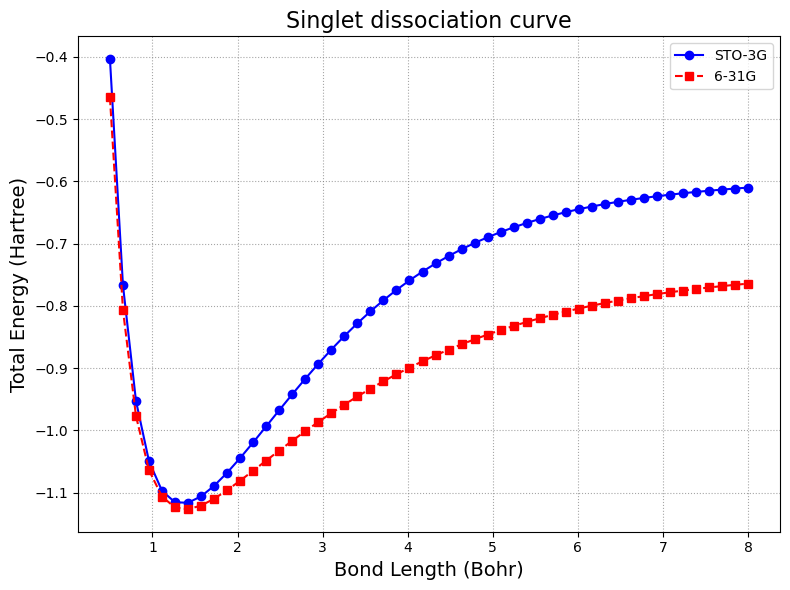

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_calculation.hartree_fock import HartreeFock

# Generate bond length range
bond_length = np.linspace(0.5, 8.0, 50)

# Lists to store energies
rhf_energy = []
rohf_energy = []

# Calculate energies for RHF and ROHF
for r in bond_length:
    H2 = f'H 0.0 0.0 0.0; H 0.0 0.0 {r}'

    # RHF calculation with sto-3g basis
    hf = HartreeFock(H2, 'sto-3g')
    hf.rhf()
    rhf_energy.append(hf.energy_total)

    # RHF calculation with 6-31g basis
    hf = HartreeFock(H2, '6-31g')
    hf.rhf()
    rohf_energy.append(hf.energy_total)

plt.figure(figsize=(8, 6))

# Plot the STO-3G and 6-31G energies with distinct styles
plt.plot(bond_length, rhf_energy, label='STO-3G',
         color='blue', linestyle='-', marker='o', markersize=6)
plt.plot(bond_length, rohf_energy, label='6-31G',
         color='red', linestyle='--', marker='s', markersize=6)

plt.title('Singlet dissociation curve', fontsize=16)
plt.xlabel('Bond Length (Bohr)', fontsize=14)
plt.ylabel('Total Energy (Hartree)', fontsize=14)
plt.grid(True, linestyle=':', color='gray', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()

**Triplet dissociation curve**

SCF converged energy: 1.1154111250539103
SCF converged energy: 0.2175449024704066
SCF converged energy: 0.5499111408335651
SCF converged energy: -0.17914071319435942
SCF converged energy: 0.1743394060581187
SCF converged energy: -0.4043907360680088
SCF converged energy: -0.09224995299783756
SCF converged energy: -0.5453169254210735
SCF converged energy: -0.2877530698273
SCF converged energy: -0.6405773010534391
SCF converged energy: -0.4335488278709859
SCF converged energy: -0.709305091184078
SCF converged energy: -0.5434510138542878
SCF converged energy: -0.7615814705309478
SCF converged energy: -0.6272062391004763
SCF converged energy: -0.8029170352310299
SCF converged energy: -0.6918396181911115
SCF converged energy: -0.8364568135934167
SCF converged energy: -0.7423487943790995
SCF converged energy: -0.8640964637494789
SCF converged energy: -0.7822181236798034
SCF converged energy: -0.8870580412569613
SCF converged energy: -0.813891112483461
SCF converged energy: -0.9062096702265551

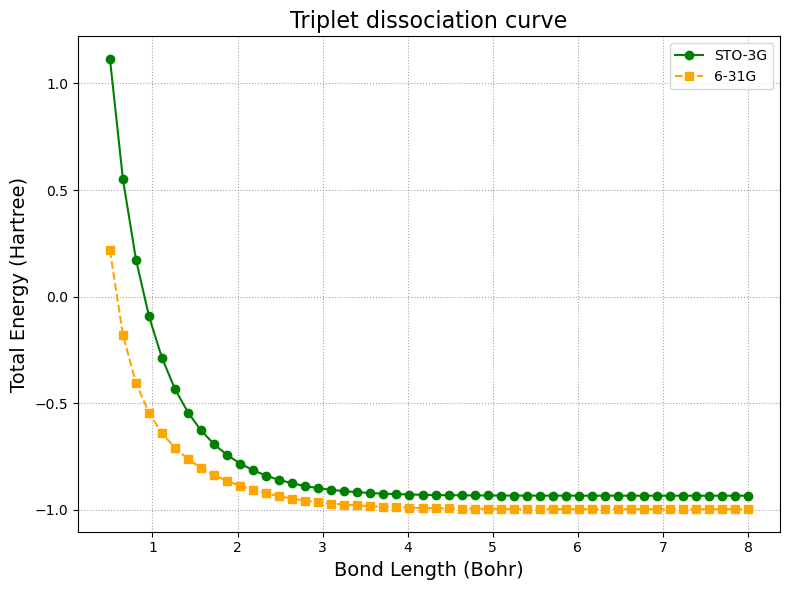

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_calculation.hartree_fock import HartreeFock

# Generate bond length range
bond_length = np.linspace(0.5, 8.0, 50)

# Lists to store energies
rhf_energy = []
rohf_energy = []

# Calculate energies for RHF and ROHF
for r in bond_length:
    H2 = f'H 0.0 0.0 0.0; H 0.0 0.0 {r}'

    # RHF calculation with sto-3g basis
    hf = HartreeFock(H2, 'sto-3g', spin=1)
    hf.rohf()
    rhf_energy.append(hf.energy_total)

    # RHF calculation with 6-31g basis
    hf = HartreeFock(H2, '6-31g', spin=1)
    hf.rohf()
    rohf_energy.append(hf.energy_total)

plt.figure(figsize=(8, 6))

# Plot the STO-3G and 6-31G energies with distinct styles
plt.plot(bond_length, rhf_energy, label='STO-3G',
         color='green', linestyle='-', marker='o', markersize=6)
plt.plot(bond_length, rohf_energy, label='6-31G',
         color='orange', linestyle='--', marker='s', markersize=6)

plt.title('Triplet dissociation curve', fontsize=16)
plt.xlabel('Bond Length (Bohr)', fontsize=14)
plt.ylabel('Total Energy (Hartree)', fontsize=14)
plt.grid(True, linestyle=':', color='gray', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# the minimum energy of STO-3G basis set
min_energy = min(rhf_energy)
min_energy_index = rhf_energy.index(min_energy)
opt_bond_length = bond_length[min_energy_index]

print('STO-3G basis set:')
print(f'Minimum energy: {min_energy:.6f} Ha')
print(f'Optimal bond length: {opt_bond_length:.2f} Bohr')

# the minimum energy of 6-31G basis set
min_energy = min(rohf_energy)
min_energy_index = rohf_energy.index(min_energy)
opt_bond_length = bond_length[min_energy_index]

print('\n6-31G basis set:')
print(f'Minimum energy: {min_energy:.6f} Ha')
print(f'Optimal bond length: {opt_bond_length:.2f} Bohr')

STO-3G basis set:
Minimum energy: -1.116112 Ha
Optimal bond length: 1.42 Bohr

6-31G basis set:
Minimum energy: -1.126528 Ha
Optimal bond length: 1.42 Bohr


SCF converged energy: -0.40332637072663236
SCF converged energy: 1.1154111250539103
SCF converged energy: -0.7669180694239177
SCF converged energy: 0.5499111408335651
SCF converged energy: -0.9526635483432384
SCF converged energy: 0.1743394060581187
SCF converged energy: -1.0495504894693475
SCF converged energy: -0.09224995299783756
SCF converged energy: -1.0970975934796092
SCF converged energy: -0.2877530698273
SCF converged energy: -1.1154744645132406
SCF converged energy: -0.4335488278709859
SCF converged energy: -1.1161123898538572
SCF converged energy: -0.5434510138542878
SCF converged energy: -1.1058834820834758
SCF converged energy: -0.6272062391004763
SCF converged energy: -1.0889694616520154
SCF converged energy: -0.6918396181911115
SCF converged energy: -1.0679095640737937
SCF converged energy: -0.7423487943790995
SCF converged energy: -1.04430342099151
SCF converged energy: -0.7822181236798034
SCF converged energy: -1.0192144066198687
SCF converged energy: -0.813891112483461

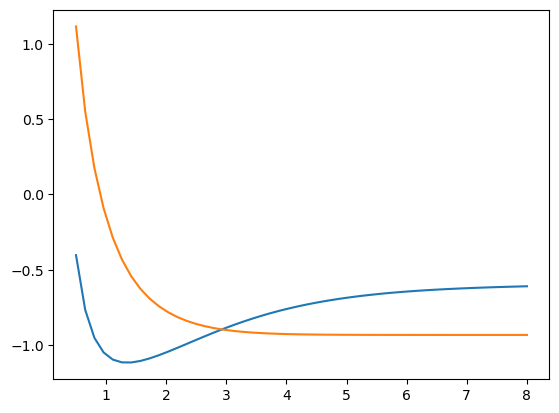

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_calculation.hartree_fock import HartreeFock

bond_length = np.linspace(0.5, 8.0, 50)

rhf_energy = []
rohf_energy = []
for r in bond_length:
    H2 = f'H 0.0 0.0 0.0; H 0.0 0.0 {r}'
    hf = HartreeFock(H2, 'sto-3g')
    hf.rhf()
    rhf_energy.append(hf.energy_total)

    hf = HartreeFock(H2, 'sto-3g', spin=1)
    hf.rohf()
    rohf_energy.append(hf.energy_total)

plt.plot(bond_length, rhf_energy)
plt.plot(bond_length, rohf_energy)

SCF converged energy: -0.46538560212064883
SCF converged energy: 0.2175449024704066
SCF converged energy: -0.8066259366600192
SCF converged energy: -0.17914071319435942
SCF converged energy: -0.9768854240519709
SCF converged energy: -0.4043907360680088
SCF converged energy: -1.0638679430523943
SCF converged energy: -0.5453169254210735
SCF converged energy: -1.1063634663668003
SCF converged energy: -0.6405773010534391
SCF converged energy: -1.1237597022442998
SCF converged energy: -0.709305091184078
SCF converged energy: -1.1265279679542524
SCF converged energy: -0.7615814705309478
SCF converged energy: -1.1206706416411971
SCF converged energy: -0.8029170352310299
SCF converged energy: -1.1097623137747723
SCF converged energy: -0.8364568135934167
SCF converged energy: -1.0959823868801246
SCF converged energy: -0.8640964637494789
SCF converged energy: -1.0806705462289345
SCF converged energy: -0.8870580412569613
SCF converged energy: -1.0646540152946473
SCF converged energy: -0.906209670

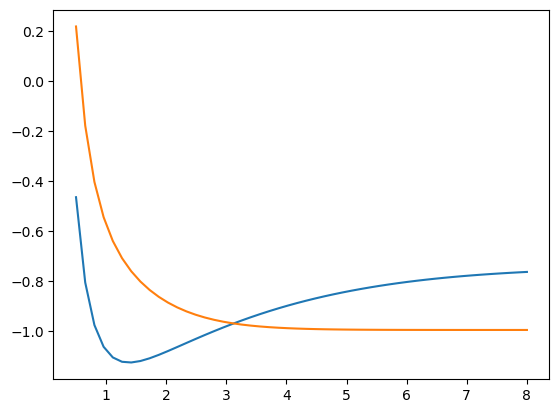

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_calculation.hartree_fock import HartreeFock

bond_length = np.linspace(0.5, 8.0, 50)

rhf_energy = []
rohf_energy = []
for r in bond_length:
    H2 = f'H 0.0 0.0 0.0; H 0.0 0.0 {r}'
    hf = HartreeFock(H2, '6-31G')
    hf.rhf()
    rhf_energy.append(hf.energy_total)

    hf = HartreeFock(H2, '6-31G', spin=1)
    hf.rohf()
    rohf_energy.append(hf.energy_total)

plt.plot(bond_length, rhf_energy)
plt.plot(bond_length, rohf_energy)

지금 생각난 것:

1. Mol class, HF class 따로 만들기
2. __rhf(params), __rohf(params) 함수 따로 만들기
3. params에는 overlap, kinetic 등의 행렬이 포함된 딕셔너리 또는 컨테이너 클래스
4. ROHF에서 unpaired spin 개수가 곧 open shell electron 개수니까 그냥 빼면 됨